# Example 8: KANs' Scaling Laws

In this example, we show KAN's scaling laws (wrt model params and data size)

In [1]:
from kan import *

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=3, k=3)

data_sizes = np.array([100,300,1000,3000])
grids = np.array([5,10,20,50,100])

train_losses = np.zeros((data_sizes.shape[0], grids.shape[0]))
test_losses = np.zeros((data_sizes.shape[0], grids.shape[0]))
steps = 50
k = 3

for j in range(data_sizes.shape[0]):
    data_size = data_sizes[j]
    print(f'data_size={data_size}')
    # create dataset
    f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
    dataset = create_dataset(f, n_var=2, train_num=data_size)
    
    for i in range(grids.shape[0]):
        print(f'grid_size={grids[i]}')
        if i == 0:
            model = KAN(width=[2,1,1], grid=grids[i], k=k)
        if i != 0:
            model = KAN(width=[2,1,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
        results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step = 30)
        train_losses[j][i] = results['train_loss'][-1]
        test_losses[j][i] = results['test_loss'][-1]


data_size=100
grid_size=5


train loss: 5.22e-03 | test loss: 7.32e-03 | reg: 2.91e+00 : 100%|██| 50/50 [00:07<00:00,  7.10it/s]


grid_size=10


train loss: 2.20e-04 | test loss: 8.06e-04 | reg: 2.90e+00 : 100%|██| 50/50 [00:06<00:00,  7.48it/s]


grid_size=20


train loss: 7.01e-06 | test loss: 3.07e-04 | reg: 2.90e+00 : 100%|██| 50/50 [00:07<00:00,  6.73it/s]


grid_size=50


train loss: 1.97e-04 | test loss: 3.15e-02 | reg: 2.90e+00 : 100%|██| 50/50 [00:07<00:00,  6.45it/s]


grid_size=100


train loss: 2.00e-03 | test loss: 1.65e+00 | reg: 3.05e+00 : 100%|██| 50/50 [00:07<00:00,  6.35it/s]


data_size=300
grid_size=5


train loss: 5.80e-03 | test loss: 6.71e-03 | reg: 2.88e+00 : 100%|██| 50/50 [00:06<00:00,  7.23it/s]


grid_size=10


train loss: 3.19e-04 | test loss: 3.15e-04 | reg: 2.89e+00 : 100%|██| 50/50 [00:06<00:00,  7.31it/s]


grid_size=20


train loss: 1.96e-05 | test loss: 2.34e-05 | reg: 2.89e+00 : 100%|██| 50/50 [00:07<00:00,  6.67it/s]


grid_size=50


train loss: 2.08e-06 | test loss: 5.00e-06 | reg: 2.89e+00 : 100%|██| 50/50 [00:11<00:00,  4.37it/s]


grid_size=100


train loss: 2.81e-07 | test loss: 3.41e-02 | reg: 2.89e+00 : 100%|██| 50/50 [00:17<00:00,  2.83it/s]


data_size=1000
grid_size=5


train loss: 6.45e-03 | test loss: 6.44e-03 | reg: 2.91e+00 : 100%|██| 50/50 [00:07<00:00,  6.72it/s]


grid_size=10


train loss: 4.14e-04 | test loss: 3.76e-04 | reg: 2.94e+00 : 100%|██| 50/50 [00:07<00:00,  6.54it/s]


grid_size=20


train loss: 4.94e-05 | test loss: 4.69e-05 | reg: 2.93e+00 : 100%|██| 50/50 [00:14<00:00,  3.44it/s]


grid_size=50


train loss: 5.21e-06 | test loss: 1.30e-05 | reg: 2.93e+00 : 100%|██| 50/50 [00:49<00:00,  1.01it/s]


grid_size=100


train loss: 2.12e-06 | test loss: 1.05e-05 | reg: 2.93e+00 : 100%|██| 50/50 [01:15<00:00,  1.51s/it]


data_size=3000
grid_size=5


train loss: 6.12e-03 | test loss: 6.77e-03 | reg: 2.79e+00 : 100%|██| 50/50 [00:16<00:00,  2.99it/s]


grid_size=10


train loss: 2.98e-04 | test loss: 3.35e-04 | reg: 2.78e+00 : 100%|██| 50/50 [00:34<00:00,  1.44it/s]


grid_size=20


train loss: 1.72e-05 | test loss: 1.86e-05 | reg: 2.78e+00 : 100%|██| 50/50 [00:38<00:00,  1.31it/s]


grid_size=50


train loss: 3.97e-07 | test loss: 4.93e-07 | reg: 2.78e+00 : 100%|██| 50/50 [00:51<00:00,  1.03s/it]


grid_size=100


train loss: 2.61e-08 | test loss: 3.27e-08 | reg: 2.78e+00 : 100%|██| 50/50 [00:26<00:00,  1.85it/s]


Fix data size, study model (grid) size scaling. Roughly display $N^{-4}$ scaling.

Text(0.5, 0, 'grid size')

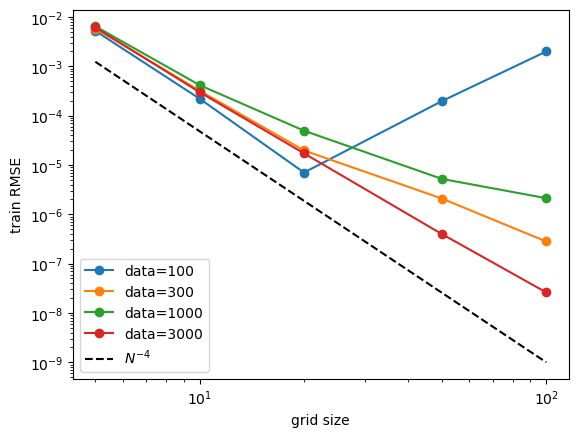

In [2]:
for i in range(data_sizes.shape[0]):
    plt.plot(grids, train_losses[i,:], marker="o")
plt.xscale('log')
plt.yscale('log')
plt.plot(np.array([5,100]), 0.1*np.array([3,100])**(-4.), ls="--", color="black")
plt.legend([f'data={data_sizes[i]}' for i in range(data_sizes.shape[0])]+[r'$N^{-4}$'])
plt.ylabel('train RMSE')
plt.xlabel('grid size')

Text(0.5, 0, 'grid size')

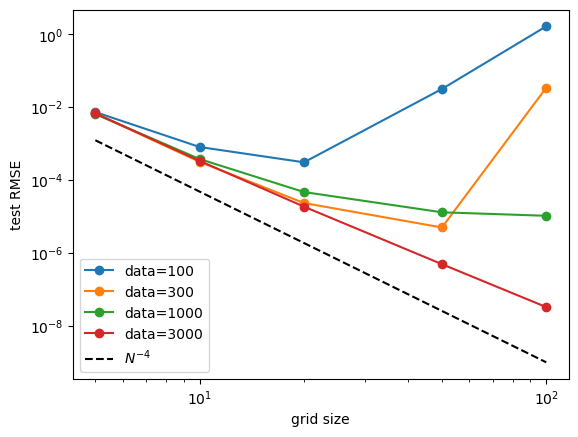

In [3]:
for i in range(data_sizes.shape[0]):
    plt.plot(grids, test_losses[i,:], marker="o")
plt.xscale('log')
plt.yscale('log')
plt.plot(np.array([5,100]), 0.1*np.array([3,100])**(-4.), ls="--", color="black")
plt.legend([f'data={data_sizes[i]}' for i in range(data_sizes.shape[0])]+[r'$N^{-4}$'])
plt.ylabel('test RMSE')
plt.xlabel('grid size')

Fix model (grid) size, study data size scaling. No clear power law scaling. But we observe that: (1) increasing data size has no harm to performance. (2) powerful model (larger grid size) can benefit more from data size increase. Ideally one would want to increase data size and model size together so that their complexity always match.

Text(0.5, 0, 'data size')

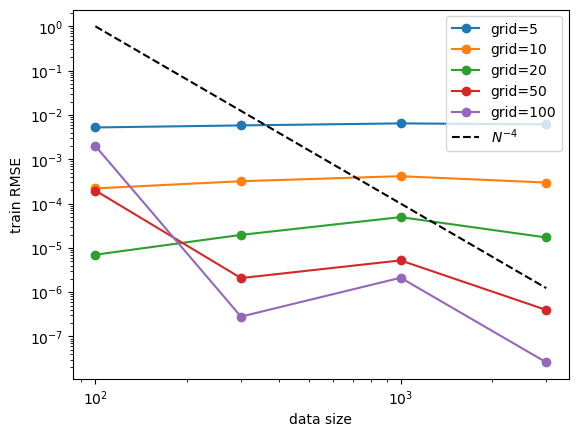

In [4]:
for i in range(grids.shape[0]):
    plt.plot(data_sizes, train_losses[:,i], marker="o")
plt.xscale('log')
plt.yscale('log')
plt.plot(np.array([100,3000]), 1e8*np.array([100,3000])**(-4.), ls="--", color="black")
plt.legend([f'grid={grids[i]}' for i in range(grids.shape[0])]+[r'$N^{-4}$'])
plt.ylabel('train RMSE')
plt.xlabel('data size')

Text(0.5, 0, 'data size')

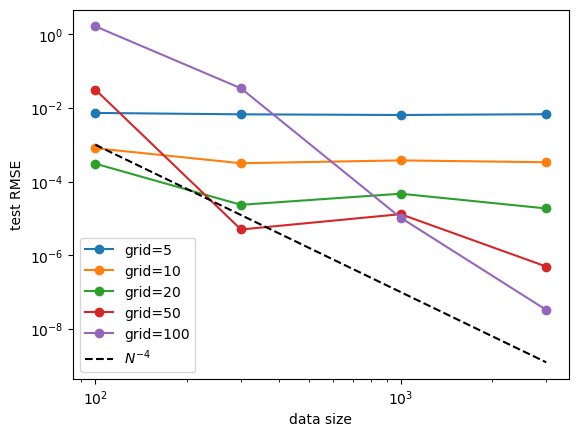

In [5]:
for i in range(grids.shape[0]):
    plt.plot(data_sizes, test_losses[:,i], marker="o")
plt.xscale('log')
plt.yscale('log')
plt.plot(np.array([100,3000]), 1e5*np.array([100,3000])**(-4.), ls="--", color="black")
plt.legend([f'grid={grids[i]}' for i in range(grids.shape[0])]+[r'$N^{-4}$'])
plt.ylabel('test RMSE')
plt.xlabel('data size')